In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('/content/StudentPerformanceFactors.csv')

In [5]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [6]:
df.shape

(6607, 20)

In [7]:
df.isna().sum().sum()

np.int64(235)

In [8]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [11]:
col=df.columns
for i in col:
  if df[i].dtype=='object':
    print( i,df[i].nunique())

Parental_Involvement 3
Access_to_Resources 3
Extracurricular_Activities 2
Motivation_Level 3
Internet_Access 2
Family_Income 3
Teacher_Quality 3
School_Type 2
Peer_Influence 3
Learning_Disabilities 2
Parental_Education_Level 3
Distance_from_Home 3
Gender 2


In [12]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
for i in col:
  if df[i].dtype=='object':
    df[i] = lb.fit_transform(df[i])
    print("done: ",i)

done:  Parental_Involvement
done:  Access_to_Resources
done:  Extracurricular_Activities
done:  Motivation_Level
done:  Internet_Access
done:  Family_Income
done:  Teacher_Quality
done:  School_Type
done:  Peer_Influence
done:  Learning_Disabilities
done:  Parental_Education_Level
done:  Distance_from_Home
done:  Gender


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours_Studied,6607.0,19.975329,5.990594,1.0,16.0,20.0,24.0,44.0
Attendance,6607.0,79.977448,11.547475,60.0,70.0,80.0,90.0,100.0
Parental_Involvement,6607.0,1.220070,0.865634,0.0,0.0,2.0,2.0,2.0
Access_to_Resources,6607.0,1.203421,0.871783,0.0,0.0,2.0,2.0,2.0
Extracurricular_Activities,6607.0,0.596035,0.490728,0.0,0.0,1.0,1.0,1.0
Sleep_Hours,6607.0,7.029060,1.468120,4.0,6.0,7.0,8.0,10.0
Previous_Scores,6607.0,75.070531,14.399784,50.0,63.0,75.0,88.0,100.0
Motivation_Level,6607.0,1.307553,0.782515,0.0,1.0,2.0,2.0,2.0
Internet_Access,6607.0,0.924474,0.264258,0.0,1.0,1.0,1.0,1.0
Tutoring_Sessions,6607.0,1.493719,1.230570,0.0,1.0,1.0,2.0,8.0


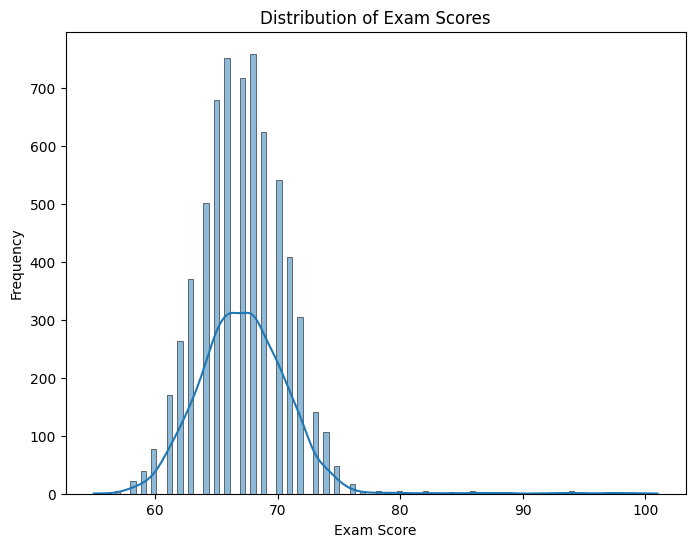

In [14]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Exam_Score'], kde=True)
plt.title('Distribution of Exam Scores')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.show()

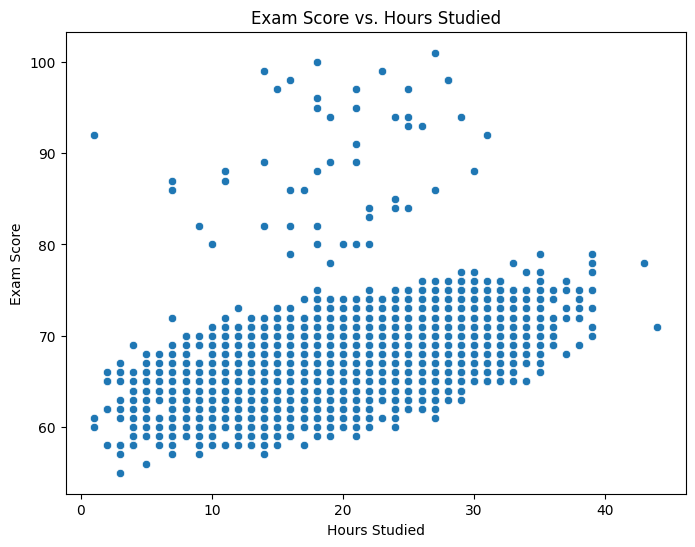

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Hours_Studied', y='Exam_Score', data=df)
plt.title('Exam Score vs. Hours Studied')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.show()

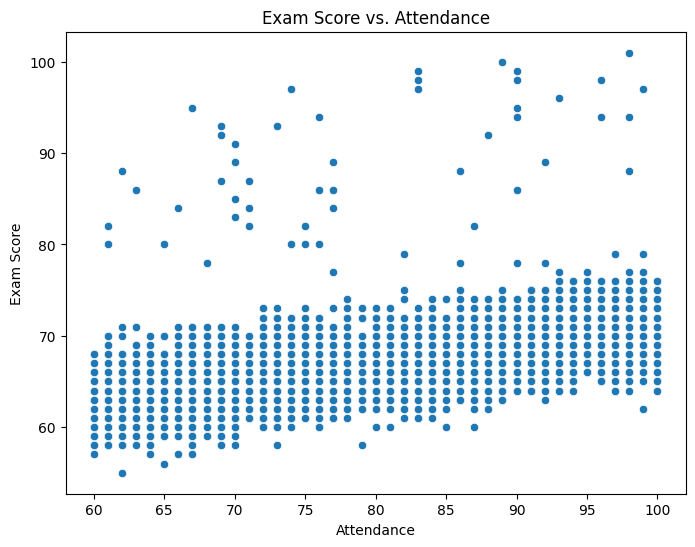

In [16]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Attendance', y='Exam_Score', data=df)
plt.title('Exam Score vs. Attendance')
plt.xlabel('Attendance')
plt.ylabel('Exam Score')
plt.show()

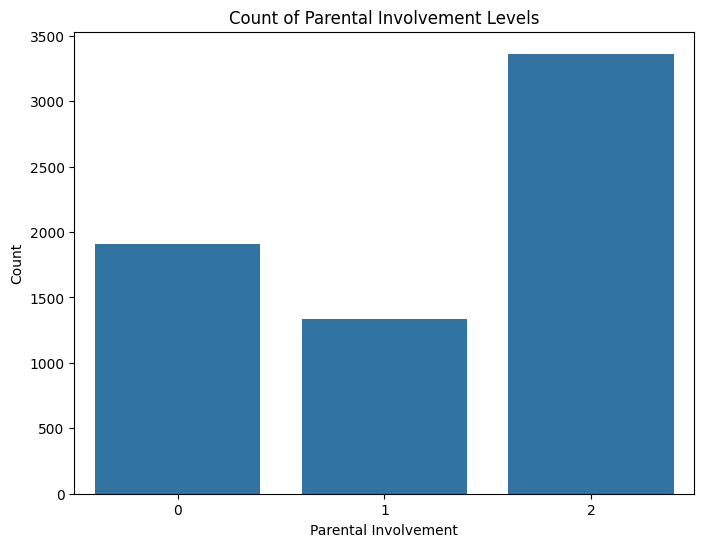

In [17]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Parental_Involvement', data=df)
plt.title('Count of Parental Involvement Levels')
plt.xlabel('Parental Involvement')
plt.ylabel('Count')
plt.show()

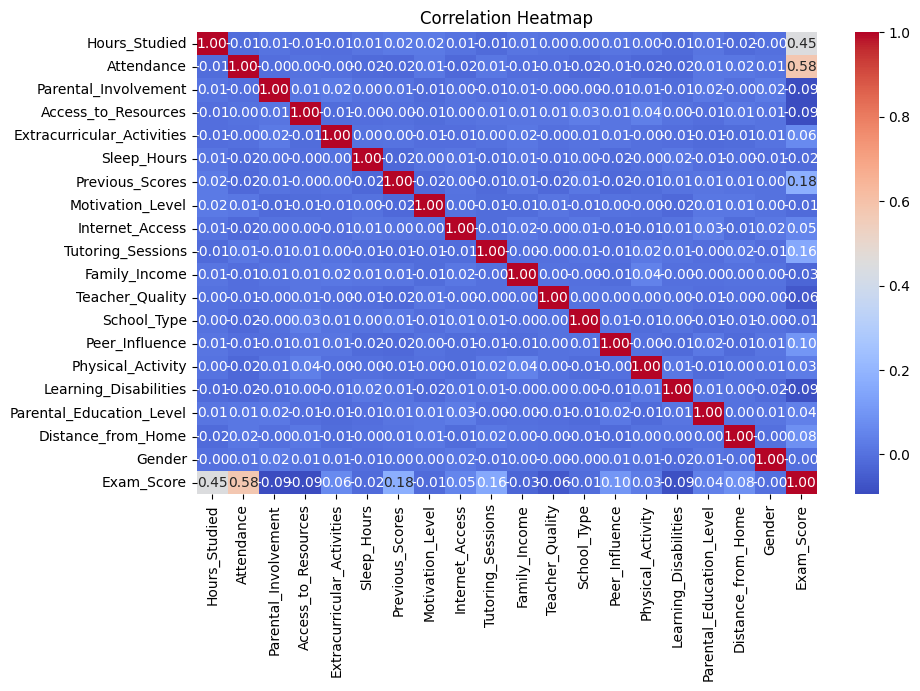

In [19]:
# Calculate the correlation matrix
corr = df.corr()

# Generate the heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Correlation Heatmap")
plt.show()

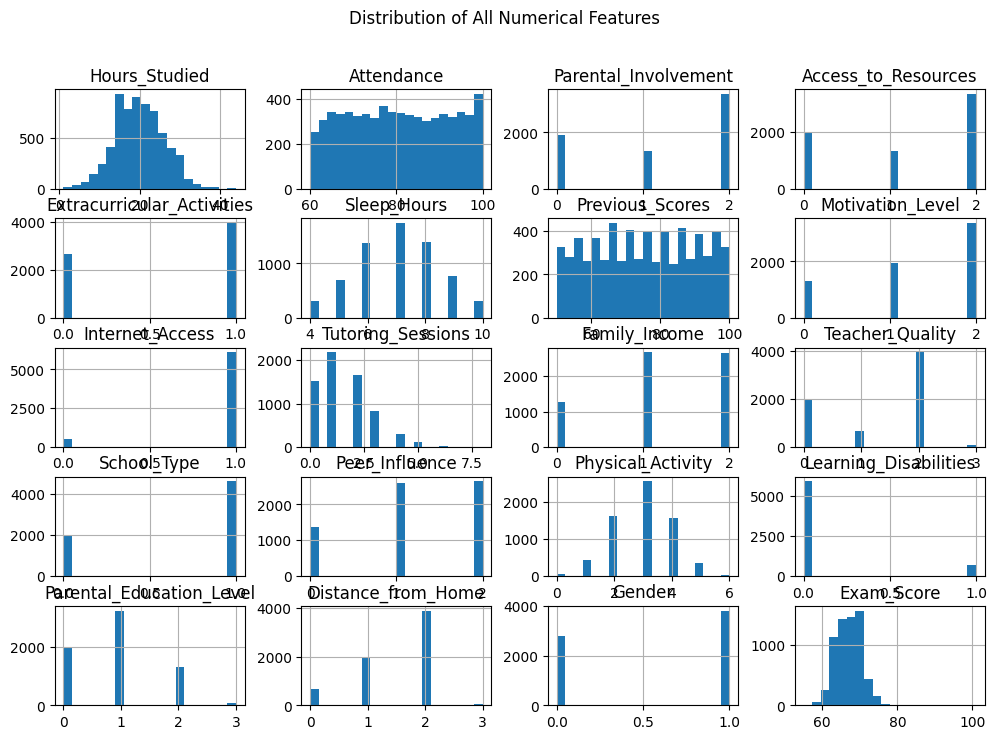

In [20]:
df.hist(figsize=(12,8), bins=20)
plt.suptitle("Distribution of All Numerical Features")
plt.show()

In [21]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,1,0,0,7,73,1,1,0,1,2,1,2,3,0,1,2,1,67
1,19,64,1,2,0,8,59,1,1,2,2,2,1,0,4,0,0,1,0,61
2,24,98,2,2,1,7,91,2,1,2,2,2,1,1,4,0,2,2,1,74
3,29,89,1,2,1,8,98,2,1,1,2,2,1,0,4,0,1,1,1,71
4,19,92,2,2,1,6,65,2,1,3,2,0,1,1,4,0,0,2,0,70


In [24]:
X=df.drop('Exam_Score',axis=1)
y=df['Exam_Score']

In [25]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=42)

<Axes: xlabel='Exam_Score'>

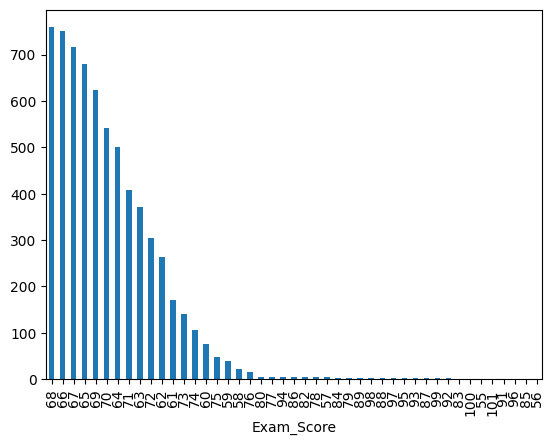

In [28]:
y.value_counts().plot.bar()

In [29]:
from sklearn.preprocessing import MinMaxScaler
my_scaler = MinMaxScaler(feature_range=(0,1))
X_scaler_minMax = my_scaler.fit_transform(X)

In [30]:
X_scaler_minMax.min(),X_scaler_minMax.max()

(np.float64(0.0), np.float64(1.0))

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaler_minMax,y,
                                   test_size= 0.20, random_state=42)

In [34]:
print("X_train = ",X_train.shape ," y_train = ", y_train.shape)
print("X_test  = ",X_test.shape ," y_test  = ", y_test.shape)

X_train =  (5285, 19)  y_train =  (5285,)
X_test  =  (1322, 19)  y_test  =  (1322,)


In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,precision_score,recall_score,f1_score
from tqdm import tqdm

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBRegressor # Changed from XGBClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,precision_score,recall_score,f1_score
from tqdm import tqdm

In [40]:
from sklearn.linear_model import LinearRegression # Changed from LogisticRegression
from sklearn.tree import DecisionTreeRegressor # Changed from DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor # Changed from RandomForestClassifier
from xgboost import XGBRegressor

models={
    'LinearRegression':LinearRegression(), # Changed model
    "DecisionTreeRegressor":DecisionTreeRegressor(), # Changed model
    "RandomForestRegressor":RandomForestRegressor(n_estimators= 30, max_depth=10, random_state=42), # Changed model and parameters
    "XGBRegressor":XGBRegressor(random_state=42)
}

models_loss={}
for model_name , model in tqdm(models.items()):
    model.fit(X_train,y_train)
    y_pred_train=model.predict(X_train)
    y_pred_test=model.predict(X_test)
    # The evaluation metrics are for classification, need to change them for regression
    # models_loss[model_name]=[
    #     accuracy_score(y_train,y_pred_train),
    #     accuracy_score(y_test,y_pred_test),
    #     precision_score(y_train,y_pred_train,average="micro"),
    #     precision_score(y_test,y_pred_test,average="micro"),

    #     recall_score(y_train,y_pred_train,average="micro"),
    #     recall_score(y_test,y_pred_test,average="micro"),
    #     f1_score(y_train,y_pred_train,average="micro"),
    #     f1_score(y_test,y_pred_test,average="micro"),

    # ]
    print(f"Model: {model_name}")
    print(f"Train R2: {model.score(X_train, y_train)}")
    print(f"Test R2: {model.score(X_test, y_test)}")

 50%|█████     | 2/4 [00:00<00:00, 19.05it/s]

Model: LinearRegression
Train R2: 0.642389930853521
Test R2: 0.6886194019277315
Model: DecisionTreeRegressor
Train R2: 1.0
Test R2: 0.34257583093017874


100%|██████████| 4/4 [00:00<00:00,  4.66it/s]

Model: RandomForestRegressor
Train R2: 0.898023267598179
Test R2: 0.6333243254650789
Model: XGBRegressor
Train R2: 0.9759035110473633
Test R2: 0.6638498902320862


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df.drop("Exam_Score", axis=1)  # المدخلات
y = df["Exam_Score"]              # التارجت (قيم رقمية)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

X = df.drop("Exam_Score", axis=1)  # المدخلات
y = df["Exam_Score"]              # التارجت (قيم رقمية)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)      # متوسط الخطأ المطلق
mse = mean_squared_error(y_test, y_pred)       # متوسط مربع الخطأ
rmse = np.sqrt(mse)                            # الجذر التربيعي لمتوسط مربع الخطأ
r2 = r2_score(y_test, y_pred)                  # معامل التحديد R2

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R2 Score: {r2}")

Mean Absolute Error (MAE): 1.0156733842910806
Mean Squared Error (MSE): 4.401387320454959
Root Mean Squared Error (RMSE): 2.097948359816075
R2 Score: 0.688619401927732


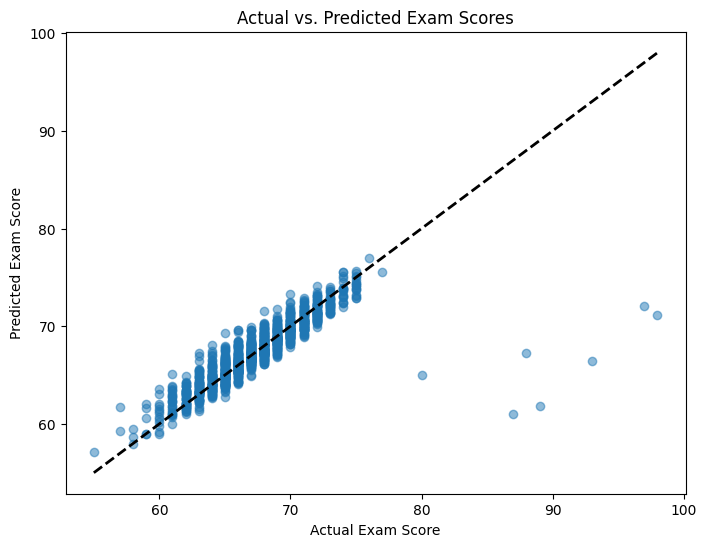

In [51]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Exam Score")
plt.ylabel("Predicted Exam Score")
plt.title("Actual vs. Predicted Exam Scores")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()



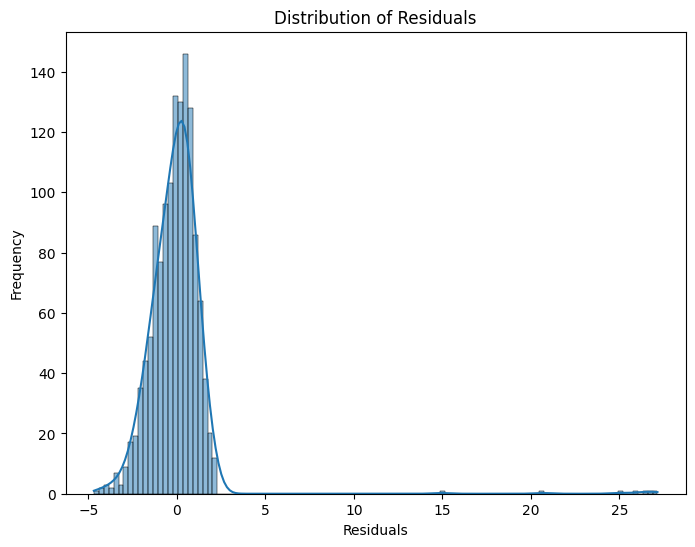

In [49]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()

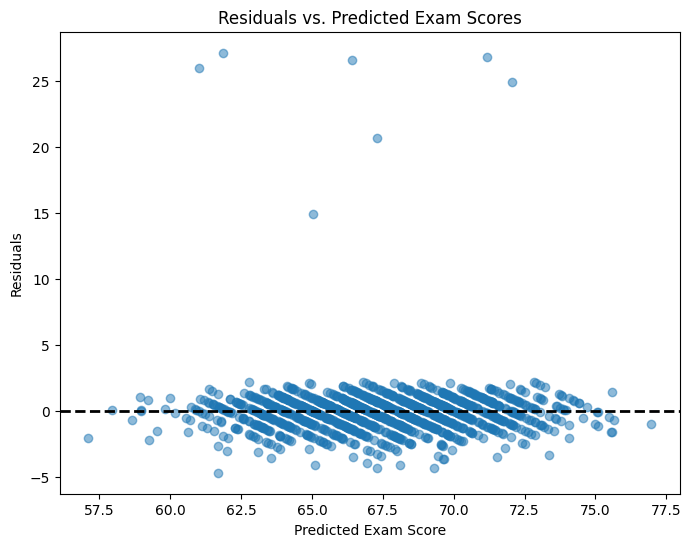

In [50]:
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel("Predicted Exam Score")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Exam Scores")
plt.axhline(y=0, color='k', linestyle='--', lw=2) # Add a horizontal line at 0
plt.show()